# CSCI 381/780 (Fall 2022) - Project 2

**Due Date: Monday, November 14 by 4 PM**

## Description
In this project you will construct machine learning models on two different real-world datasets using unsupervised learning and regression.

## Instructions
1. In this project you will write code to construct machine learning models and write responses to questions concerning the performance of said models. Please complete all sections below, adding new *Code* or *Markdown* cells as appropriate to answer the questions.
2. There are many Scikit-learn functions that leverage randomness to generate results. For these functions, a pseudorandom generator can be initialized using a seed value by passing the parameter `random_state=XXX`, where `XXX` is some number between 1 and 2^31-1. For each of these functions, **you will utilize your CUNY ID number** to initialize the function. Functions include:
- `ShuffleSplit`
- `KFold`
- `KMeans`
- `GridSearchCV`
- `Lasso`
- `MLPRegressor`
3. You will **work independently** on the project. Please make use of the *Python Data Science Reference Materials* posted on Blackboard, or **come to office hours should you need further assistance**.
4. You will submit a single Jupyter notebook containing all code and written responses via Blackboard by the due date listed above. 

## Grading

### Running Code
Your Jupyter notebook must be able to run from start to finish **without error**. Please turn any cell that contains scratch work or other non-executable items to *Raw*. **Notebooks that cannot run to completion will receive a grade of 0**.


### Rubric

|**Part**|1.1|1.2|2.1|2.2|2.3|2.4|2.5|2.6|**Total**|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**%**|10|30|15|5|10|10|10|10|100|


# Part 1: Clustering

In this part of the project, you will be using data collected by the US Geological Survey and the US Forest Service. The data describes various cartographic and geologic features related to forest cover in US wilderness areas, with each sample representing a 30 x 30 meter cell.

The **goal** will be to *identify clusters* that represent forest cover types, and using these clusters *extract relationships* between forest covers and the provided cartographic/geologic features.

In [1]:
cover_column_names=["Elevation","Aspect","Slope",
              "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon",
              "Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]
wilderness_cols =["Wilderness_"+str(i) for i in range(4)]
soil_col =["Soil_"+str(i) for i in range(40)]
cover_columns_names = cover_column_names + wilderness_cols + soil_col
len(cover_columns_names)

54

## 1.1 Load Data
Set the variable `COVER_FILE` to the **full path** to the forest cover dataset (**forest_cover_dataset.csv**) on your system. Load the file into a dataframe (you may initialize the column names using the header list `cover_column_names`), then:
1. Determine the number and types of features.
2. Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%. 
3. **Center** the training/validation/test splits (fit on the training set, then transform the validation/test sets). 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
sc = StandardScaler()
sns.set()
import matplotlib.pyplot as plt
import timeit
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
%matplotlib inline
COVER_FILE = pd.read_csv('forest_cover_dataset.csv', header=None)
COVER_FILE.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2825,265,17,319,108,2298,174,245,209,342,...,0,0,1,0,0,0,0,0,0,0
1,2719,198,34,134,76,2352,187,245,167,693,...,0,0,0,0,0,0,0,0,0,0
2,3146,152,14,212,41,940,237,239,130,2007,...,0,0,0,0,0,0,0,0,0,0
3,2882,18,18,95,-3,485,203,199,128,342,...,1,0,0,0,0,0,0,0,0,0
4,2912,349,17,283,57,2729,187,210,160,2201,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(COVER_FILE.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53],
           dtype='int64')


In [4]:
COVER_FILE.columns=cover_columns_names
row =len(COVER_FILE.axes[0])
column =len(COVER_FILE.axes[1])
print("Row: "+str(row))
print("Features: "+ str(column)) 
shuffle = ShuffleSplit(n_splits=1,test_size=0.2, random_state=23784559)
shuffle2 = ShuffleSplit(n_splits=1,test_size=0.25, random_state=23784559)

Row: 280251
Features: 54


In [5]:
X = COVER_FILE[cover_columns_names]
#y = COVER_FILE[cover_columns_names]
#train, test = next(shuffle.split(X=X, y=y))
train, test = next(shuffle.split(X=X))
X_test = X.loc[test]
#y_test = y.loc[test]
X_train = X.loc[train]
#y_train = y.loc[train]
X_train0=X_train
#y_train0=y_train
#train, val = next(shuffle2.split(X=X_train, y=y_train))
train, val = next(shuffle2.split(X=X_train))
X_train = X.loc[train]
#y_train = y.loc[train]
X_val = X.loc[val]
#y_val = y.loc[val]

In [6]:
sc.fit(X_train)
sc.transform(X_test)
sc.transform(X_val)

array([[ 0.1247215 ,  0.05404822,  0.78191618, ..., -0.12984599,
        -0.12134463, -0.09692576],
       [-0.12421345, -0.5715482 ,  0.78191618, ..., -0.12984599,
        -0.12134463, -0.09692576],
       [-1.79354196, -1.08989952, -1.48269747, ..., -0.12984599,
        -0.12134463, -0.09692576],
       ...,
       [ 0.42124696, -1.03627697,  0.24906591, ..., -0.12984599,
        -0.12134463, -0.09692576],
       [-2.42320096,  1.38567489,  3.04652983, ..., -0.12984599,
        -0.12134463, -0.09692576],
       [-2.7526737 , -0.10681943,  2.24725443, ..., -0.12984599,
        -0.12134463, -0.09692576]])

## 1.2 $k$-Means Clustering

1. Cluster the *training* dataset using ```KMeans``` from Scikit-learn using the values for $k$ below. You can utilize the default implementation in Scikit-learn, which is $k$-means$++$. Construct models for each value of $k$ specified in the ``k_values`` array below.
2. Apply the trained models to the validation dataset.
3. Compute the **mean** inertia for each value of $k$ on the training and validation datasets. For the training data, you can extract the *total* (**unnormalized**) inertia from the trained models via their respective ```inertia_```. For the validation models, you can utilize the function ```total_inertia``` provided below.
4. Plot the mean inertias for all values of $k$ and for both the training and validation sets on a single plot. Based on the elbow method, which value of $k$ should be chosen so that the model will generalize to new data?
5. The *Silhouette Coefficient* is another cluster performance metric that combines intra-cluster distance with inter-cluster distances from clusters in close proximity to each other. Utilize Scikit-learn's ```silhouette_score``` function [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) to compute the silhouette coefficient for all values of $k$ on the *validation* set. Plot these values and determine via the elbow method which value of $k$ should be chosen. How does this value compare to the one chosen using mean inertia?
6. Using whichever value of $k$ you think is the best based on steps 4) and 5), create a plot for each feature that contains [boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) of that feature for each cluster. Based upon these plots, determine which features you think are meaningful in discriminating between the clusters, as well as any other trends you observe.

### Please Read!
You may benefit from parallelizing the creation of the $k$-means models by using the Python package ```joblib```. I've included a code template below that you can customize. For additional details, please refer to [joblib's documentation](https://joblib.readthedocs.io/en/latest/parallel.html).

In [7]:
k_values=list(range(2,11))+[15,20]

In [8]:
#from joblib import Parallel, delayed, parallel_backend

#with parallel_backend("loky", inner_max_num_threads=2):
#    results = Parallel(n_jobs=4)(delayed(func)(x, y) for x, y in data)

In [9]:
def total_inertia(dataset,centers,labels,distance=None,mean=True):
    """
    Computes the total inertia (the intracluster variance) given a dataset and the cluster centers.
    
    Parameters
    ----------
    dataset : numpy.ndarray
        The dataset to evaluate.
    center : numpy.ndarray or list
        The list of cluster centers.
    distance : function
        A function that computes the pairwise distance between two samples.
        Default: Euclidean (l_2) distance
    mean : bool
        If True, returns the mean inertia.
        Default: True
        
    Returns
    -------
    total_inertia : float
       The mean inertia (if mean==True) or total inertia (if mean==False).
"""
    num_samples,_ = dataset.shape
    total_inertia=0
    if distance is None:
        distance=lambda x,y: np.linalg.norm(x-y)**2
    for i,sample in enumerate(dataset):
        center = centers[labels[i]]
        total_inertia += distance(sample,center)
    
    if mean:
        return total_inertia/num_samples
    else:
        return total_inertia

In [10]:
from sklearn.cluster import KMeans

In [11]:
from joblib import Parallel, delayed, parallel_backend

In [12]:
inertiameantrain = []
inertiameanval = []
silhouetteval = []
storedarray=[]
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
#def kmean1(i,inertiameantrain,inertiameanval,silhouetteval,X_train,X_val):
#    kmeantrain = KMeans(n_clusters=i,init='k-means++',random_state=23784559)
#    kmeantrain.fit(X_train)
#    inertiameantrain.append((sum(np.min(cdist(X_train,kmeantrain.cluster_centers_,'euclidean'),axis = 1))**2)/X_train.shape[0])
#    kmeantrain.fit(X_val)
#    inertiameanval.append((sum(np.min(cdist(X_val,kmeantrain.cluster_centers_,'euclidean'),axis = 1))**2)/X_val.shape[0])
#    silhouetteval.append(silhouette_score(X=X_val,labels=kmeantrain.labels_,metric='euclidean',random_state=23784559))
#    return  inertiameantrain,inertiameanval,silhouetteval
#with parallel_backend("loky", inner_max_num_threads=2):
#   inertiameantrain,inertiameanval,silhouetteval=Parallel(n_jobs=2)(delayed(kmean1)(i,inertiameantrain,inertiameanval,silhouetteval,X_train,X_val) for i in k_values)
for i in k_values:
    kmeantrain = KMeans(n_clusters=i,init='k-means++',random_state=23784559)
    kmeantrain.fit(X_train)
    inertiameantrain.append((sum(np.min(cdist(X_train,kmeantrain.cluster_centers_,'euclidean'),axis = 1)) **2)/X_train.shape[0])
    print(kmeantrain.predict(X_val))
    kmeantrain1 = KMeans(n_clusters=i,init='k-means++',random_state=23784559)
    kmeantrain1.fit(X_val)
    inertiameanval.append((sum(np.min(cdist(X_val,kmeantrain1.cluster_centers_,'euclidean'),axis = 1)) **2)/X_val.shape[0])
    silhouetteval.append(silhouette_score(X=X_val,labels=kmeantrain1.labels_,metric='euclidean',random_state=23784559))

[0 0 0 ... 1 0 0]
[0 0 0 ... 2 0 0]
[2 0 0 ... 1 0 0]
[4 1 1 ... 3 1 1]
[0 3 3 ... 1 3 3]
[6 2 2 ... 4 2 2]
[2 6 6 ... 0 6 6]
[0 1 1 ... 3 1 1]
[7 3 3 ... 8 3 3]
[ 7 12  3 ...  2 12 12]
[13 11 12 ...  2 11 11]


In [13]:
print(inertiameantrain)

[310797402362.72644, 233793583824.30545, 175228369860.1723, 139765768787.10306, 127559003745.26501, 111339306719.67148, 101804442183.69073, 92286360590.5509, 83979732602.59143, 61976627950.7885, 51312845503.72037]


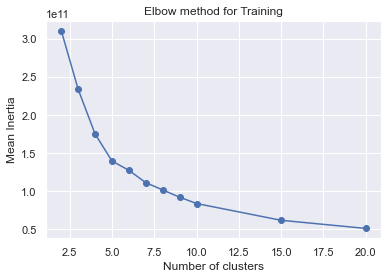

In [14]:
plt.plot(k_values, inertiameantrain,marker='o')
plt.title('Elbow method for Training')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Inertia')
plt.show()

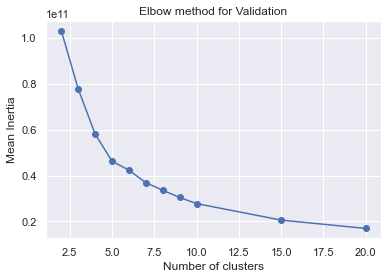

In [15]:
plt.plot(k_values, inertiameanval,marker='o')
plt.title('Elbow method for Validation')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Inertia')
plt.show()

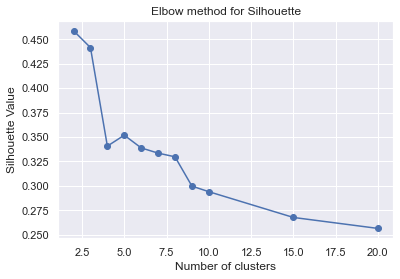

In [16]:
plt.plot(k_values, silhouetteval,marker='o')
plt.title('Elbow method for Silhouette')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Value')
plt.show()

In [17]:
print("5 is the best number of clusters in regards to mean inertia, and 9 is the best number of clusters in regards to silhouette. For mean inertia, 5 is the transition between steep and smooth, and 9 is that for silhouette. I would pick 9 as it seems to be more substantial for a large dataset and silhouette shows an unstable changing slope before 9's smoother transition.")

5 is the best number of clusters in regards to mean inertia, and 9 is the best number of clusters in regards to silhouette. For mean inertia, 5 is the transition between steep and smooth, and 9 is that for silhouette. I would pick 9 as it seems to be more substantial for a large dataset and silhouette shows an unstable changing slope before 9's smoother transition.


In [18]:
kmeantrain1 = KMeans(n_clusters=9,init='k-means++',random_state=23784559)
kmeantrain1.fit(X_val)
predict1=kmeantrain1.predict(X_val)


In [19]:
print(len(kmeantrain1.labels_))
print(X_val.shape[0])
X_valtest=X_val
X_valtest['cluster']=kmeantrain1.labels_
X_valtest.head()

56050
56050


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39,cluster
206661,2979,162,20,297,59,1948,235,241,127,1451,...,0,0,0,0,0,0,0,0,0,6
85672,2911,92,20,433,84,1084,247,204,77,450,...,0,0,0,0,0,0,0,0,0,0
35194,2455,34,3,503,99,721,219,232,149,1154,...,0,0,0,0,0,0,0,0,0,0
127400,2478,294,19,108,54,983,162,231,208,659,...,0,0,0,0,0,0,0,0,0,0
197077,3151,79,15,418,126,2190,238,212,101,1776,...,0,1,0,0,0,0,0,0,0,6


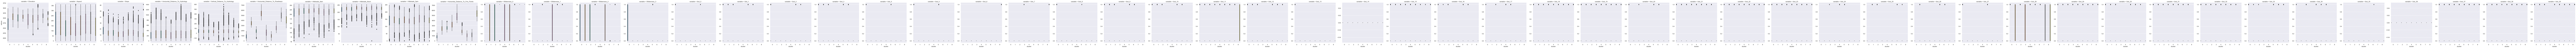

<Figure size 1440x1440 with 0 Axes>

In [20]:
X_valtest_long = X_valtest.melt(id_vars='cluster', value_vars=X_valtest.columns[:-1], var_name='variable', value_name='values')
sns.catplot(kind='box', data=X_valtest_long, col='variable', y='values', x='cluster', hue='cluster', palette="colorblind", sharey=False)
plt.figure(figsize=(20,20))
plt.show()

In [21]:
print("Click on the boxplots to magnify them. Elevation, roadway distance, fire points, and arguably aspect are good distinguishing features, soil has largely same distribution, whereas slope and hydrology have varying outlier maximums, and hillshade varying outlier minimums")

Click on the boxplots to magnify them. Elevation, roadway distance, fire points, and arguably aspect are good distinguishing features, soil has largely same distribution, whereas slope and hydrology have varying outlier maximums, and hillshade varying outlier minimums


# Part 2: Regression

In this part of the project, you will be utilizing a US database of crime and law enforcement statistics broken down by US Census communities. The **goal** will be to create *regression models* that predict *per capita violent crimes* (the response variable `ViolentCrimesPerPop`) for a given community based on these inputs. 

In [22]:
crime_column_names= ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',
                 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
                 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
                 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
                 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
                 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
                 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
                 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
                 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
                 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
                 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
                 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
                 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
                 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
                 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
                 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
                 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
                 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic',
                 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
                 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
                 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
                 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

## 2.1 Load Data
Set the variable `CRIME_FILE` to the **full path** to the forest cover dataset (**crime.csv**) on your system. Load the file into a dataframe (you may initialize the column names using the header list `crime_column_names`), then:
1. Determine the number and types of features.
2. Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%. 
3. Split the **non-test data** (*training* + *validation* data) into **5 folds** for cross-validation purposes.
4. Perform any necessary preprocessing on dataset. This may include:
  * determining if any features should be dropped;
  * handling missing data, through imputation and/or complete case analysis. If you **perform imputation on numerical values**, please use **median** imputation.

**Please note!** The Scikit-learn function `SimpleImputer` does not work as expected when the feature to impute is numerical but the missing values are not. One way to solve this is to first replace the missing values with NaN values (e.g., `np.nan`) using the Pandas Dataframe method `replace` [(documentation)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html).

In [23]:
CRIME_FILE = pd.read_csv('crime.csv', header=None)
CRIME_FILE.columns=crime_column_names
crimerow =len(COVER_FILE.axes[0])
crimecolumn =len(COVER_FILE.axes[1])
print(crimecolumn)
from sklearn.model_selection import StratifiedShuffleSplit

54


In [24]:
datatypes1 = CRIME_FILE.dtypes['state']
print(datatypes1)
datatypes2 = CRIME_FILE.dtypes['county']
print(datatypes2)
datatypes3 = CRIME_FILE.dtypes['community']
print(datatypes3)
datatypes4 = CRIME_FILE.dtypes['communityname']
print(datatypes4)

int64
object
object
object


In [25]:
CRIME_FILE.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [26]:
print(CRIME_FILE.columns)

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)


In [27]:
CRIME_FILE=CRIME_FILE.drop(['state','county','community','communityname'], axis=1)
CRIME_FILE.fillna(CRIME_FILE.median())
CRIME_FILE = CRIME_FILE.replace(['?'],np.nan)
#rowstodrop=[]
#for i in range(len(CRIME_FILE.index)):
#    nullpercentageinrow=CRIME_FILE.iloc[i].isnull().sum()/CRIME_FILE.shape[1]
#    if nullpercentageinrow>0.20:
#     rowstodrop.append(i)
#CRIME_FILE=CRIME_FILE.drop(rowstodrop, axis=0)
percentagenull={}
for i in CRIME_FILE.columns:
 percentagenull[i]=CRIME_FILE[i].isnull().sum()/CRIME_FILE.shape[0]
columnstodrop=[]
for x in percentagenull:
  currentvalue=percentagenull[x]
  if currentvalue>0.6:
    columnstodrop.append(x)
print(columnstodrop)
CRIME_FILE=CRIME_FILE.drop(columnstodrop, axis=1)
rowstodrop=[]
for i in range(len(CRIME_FILE.index)):
    nullpercentageinrow=CRIME_FILE.iloc[i].isnull().sum()/CRIME_FILE.shape[1]
    if nullpercentageinrow>0.20:
     rowstodrop.append(i)
CRIME_FILE=CRIME_FILE.drop(rowstodrop, axis=0)
CRIME_FILE.head()

['LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']


,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [28]:
CRIME_FILE['OtherPerCap'] = pd.to_numeric(CRIME_FILE['OtherPerCap'])
datatypes = CRIME_FILE.dtypes['OtherPerCap']
print(datatypes)

float64


In [29]:
nonnumericcolumns = []
numericcolumns = []
for i in CRIME_FILE.columns:
    if CRIME_FILE[i].map(type).eq(str).any():
        nonnumericcolumns.append(i)
    else:
        numericcolumns.append(i)
CRIME_FILENumeric = CRIME_FILE[numericcolumns]
CRIME_FILENonNumeric = pd.DataFrame(CRIME_FILE[nonnumericcolumns])
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(missing_values=np.nan,strategy='median')
CRIME_FILENumeric = pd.DataFrame(imp1.fit_transform(CRIME_FILENumeric),columns=CRIME_FILENumeric.columns,index=CRIME_FILENumeric.index) 
CRIME_FILENonNumeric.replace(np.nan,'Unknown')
CRIME_FILE1 = pd.concat([CRIME_FILENumeric, CRIME_FILENonNumeric],axis=1)

In [30]:
print(nonnumericcolumns)

[]


In [31]:
shuffle3 = ShuffleSplit(n_splits=1,test_size=0.2, random_state=23784559)
shuffle4 = ShuffleSplit(n_splits=5,test_size=0.25, random_state=23784559)

In [32]:
print(CRIME_FILE1.columns.tolist())

['fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'P

In [33]:
originalcolumns=CRIME_FILE1.columns.tolist()

In [34]:
CRIME_FILE1 = pd.get_dummies(CRIME_FILE1, columns=nonnumericcolumns, drop_first=False)

In [35]:
print(CRIME_FILE1.columns.tolist())

['fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'P

In [36]:
calledcol1=CRIME_FILE1.columns.tolist()
calledcol1.remove('ViolentCrimesPerPop')

In [37]:
X1 = CRIME_FILE1[calledcol1]
y1=CRIME_FILE1['ViolentCrimesPerPop']
train1, test1 = next(shuffle3.split(X=X1,y=y1))
X_test1 = X1.loc[test1]
y_test1 = y1.loc[test1]
X_train1 = X1.loc[train1]
y_train1 = y1.loc[train1]
X_train01=X_train1
y_train01=y_train1
X_test01=X_test1
y_test01=y_test1
train1, val1 = next(shuffle4.split(X=X_train1,y=y_train1))
X_train1 = X1.loc[train1]
y_train1 = y1.loc[train1]
X_val1 = X1.loc[val1]
y_val1 = y1.loc[val1]

In [38]:
from sklearn import preprocessing
X_train1 = preprocessing.scale(X_train1)
X_test1 = preprocessing.scale(X_test1)
X_val1 = preprocessing.scale(X_val1)
sc1 = StandardScaler()
sc1.fit(X_train1)
sc1.transform(X_test1)
sc1.transform(X_val1)
X_train01 = preprocessing.scale(X_train01)
X_test01 = preprocessing.scale(X_test01)
sc2 = StandardScaler()
sc2.fit_transform(X_train01)
sc2.transform(X_test01)


array([[-1.22022424,  0.14045345, -0.08639144, ..., -0.24214236,
        -0.51570649, -0.4019346 ],
       [-0.52370139,  0.95586375,  0.66705525, ..., -0.34476031,
        -0.37831485,  0.56659226],
       [-1.22022424, -0.37844401,  0.66705525, ..., -1.011777  ,
        -0.42411206, -0.4019346 ],
       ...,
       [-0.87196282,  0.36283808,  0.35311913, ..., -0.54999621,
        -0.2409232 ,  3.63359399],
       [ 0.86934431, -0.45257222, -1.02819981, ..., -0.39606929,
        -0.69889536, -0.4019346 ],
       [ 1.21760573, -0.2301876 , -0.71426369, ...,  0.21963842,
        -0.28672041, -0.4019346 ]])

In [39]:
#peformance metric functions
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['mse','mae','r2']

def p2_metrics(y_true,y_pred,negation=False):
    if negation:
        sign = -1
    else:
        sign = 1
    return {
        'mse': sign*mean_squared_error(y_true,y_pred),
        'mae': sign*mean_absolute_error(y_true,y_pred),
        'r2': sign*r2_score(y_true,y_pred)}

#This wrapper can be used to return multiple performance metrics during cross-validation
def p2_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p2_metrics(y_true,y_pred,negation=True)

## 2.2 Linear Regression

1. Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.
2. Report the following performance metrics on the **training and validation sets**:
    *Mean Squared Error*, *Mean Absolute Error*, and the *Coefficient of Determination ($r^2$)*.
    
    You can use the function `p2_metrics` for this purpose. Is this model underfitting the data? Is so, why?
3. Report the weights (coefficients) of the linear model and their associated features in ascending order.

    Larger weights indicate that their corresponding features have more influence in the model. Moreover, negative weights correspond to variables having negative correlation with the response variable, and vice versa.
    
    Using this interpretation, describe the most significant features and their correlation.

In [40]:
from sklearn.linear_model import LinearRegression
linreg1 = LinearRegression()
linreg1.fit(X_train1,y_train1)
linregpred=linreg1.predict(X_val1)
p2_metrics(y_val1,linregpred,negation=False)

{'mse': 0.018901500832311704,
 'mae': 0.09655686353902379,
 'r2': 0.6545944836863855}

In [41]:
print("While the mean squared and absolute errors are fairly minimal,and the coefficient of determination is much higher at 65% ever since I dropped some columns and changed the datatype of otherpercap. Needs more fine tuning.")

While the mean squared and absolute errors are fairly minimal,and the coefficient of determination is much higher at 65% ever since I dropped some columns and changed the datatype of otherpercap. Needs more fine tuning.


In [42]:
from operator import itemgetter
from heapq import nlargest
coefficient=linreg1.coef_.tolist()
#columns1=CRIME_FILE1.columns.tolist()
linregdict={}
originalcolumns1=originalcolumns
originalcolumns1.remove('ViolentCrimesPerPop')
for key in originalcolumns1:
    for value in coefficient:
        linregdict[key] = value
        coefficient.remove(value)
        break
dict2 =dict(sorted(linregdict.items(), key = itemgetter(1), reverse = True)[:10])
print("The top 10 weights without removing dummies are are  " + str(dict2))

The top 10 weights without removing dummies are are  {'PctHousOwnOcc': 0.18866769913792636, 'PctRecImmig10': 0.09366262142680656, 'OwnOccMedVal': 0.07962872871668798, 'PctPersDenseHous': 0.0756316443108043, 'MalePctDivorce': 0.06407112488679172, 'medFamInc': 0.06156073872190545, 'PersPerOccupHous': 0.06079410143003777, 'PctEmploy': 0.05475050666339128, 'MedRent': 0.05204945088351254, 'racepctblack': 0.048923732382330665}


In [43]:
dictwithnodummies={}
for i in calledcol1:
 dictwithnodummies[i]=0
for keys in dictwithnodummies:
 keywith_=keys+'_'
 for keys2 in linregdict:
  if keys==keys2 or keywith_ in keys2:
    dictwithnodummies[keys]=dictwithnodummies[keys]+linregdict[keys2]
  
print(dictwithnodummies)

{'fold': -0.006461756852998491, 'population': 0.02741395137213775, 'householdsize': -0.005063203669380147, 'racepctblack': 0.048923732382330665, 'racePctWhite': -0.014510663483528374, 'racePctAsian': -0.014397507891167179, 'racePctHisp': -0.012734299893115754, 'agePct12t21': 0.018451650597849468, 'agePct12t29': -0.03329529922462407, 'agePct16t24': -0.014400347958176615, 'agePct65up': 0.015467960720988447, 'numbUrban': -0.04215828969475052, 'pctUrban': 0.021908017521516016, 'medIncome': -0.027371215552670046, 'pctWWage': -0.04542882252846586, 'pctWFarmSelf': 0.011829497813466979, 'pctWInvInc': -0.029732398058560146, 'pctWSocSec': -0.003266788654959822, 'pctWPubAsst': 0.021810550118562005, 'pctWRetire': -0.01636497696327151, 'medFamInc': 0.06156073872190545, 'perCapInc': -0.008166851405606738, 'whitePerCap': -0.04037145610031188, 'blackPerCap': -0.005965769517067427, 'indianPerCap': -0.006477699104031574, 'AsianPerCap': 0.01157778969611019, 'OtherPerCap': 0.007400106612009462, 'HispPerCa

In [44]:
dict3 =dict(sorted(dictwithnodummies.items(), key = itemgetter(1), reverse = True)[:10])
print("The top 10 weights with no dummies are are  " + str(dict3))

The top 10 weights with no dummies are are  {'PctHousOwnOcc': 0.18866769913792636, 'PctRecImmig10': 0.09366262142680656, 'OwnOccMedVal': 0.07962872871668798, 'PctPersDenseHous': 0.0756316443108043, 'MalePctDivorce': 0.06407112488679172, 'medFamInc': 0.06156073872190545, 'PersPerOccupHous': 0.06079410143003777, 'PctEmploy': 0.05475050666339128, 'MedRent': 0.05204945088351254, 'racepctblack': 0.048923732382330665}


In [71]:
print('Percentage of house ownage, recent immigrants,owner occupied housing, dense housing, male divorce, family income,persons per occupied house, percent employed, median rent, and black percentage are the most weighing factors. This indicates unstable working class urban (often black) neighborhoods are more likely to suffer from criminal violence')

Percentage of house ownage, recent immigrants,owner occupied housing, dense housing, male divorce, family income,persons per occupied house, percent employed, median rent, and black percentage are the most weighing factors. This indicates unstable working class urban (often black) neighborhoods are more likely to suffer from criminal violence


## 2.3 Linear Regression and PCA

1. Perform principal component analysis on the **training data**. You may use Scikit-learn's `PCA` function for this, which **automatically centers** the data prior to PCA. Using PCA, *choose the number of components* for which the total explained variance is $\ge 99\%$, and report this.
2. After determining the correct number of components, apply the PCA transformation to the **validation** and **test** sets.
3. Create another model via `LinearRegression` but using the data transformed by PCA
Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.
4. Report the same performance metrics as in 2.2 on the **validation set**. How does the model's performance compare to that of the model in 2.2?

In [46]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=0.99)
pca1.fit(X_train1)
crimerowtrain =X_train1.shape[0]
crimecolumntrain =X_train1.shape[1]
print(pca1.explained_variance_ratio_)
cumarray=np.cumsum(pca1.explained_variance_ratio_)
print(cumarray)
cumindex=0
while(cumindex<len(cumarray)):
 if(cumarray[cumindex]>=0.99): 
    break
 cumindex=cumindex+1
cumindex
cumindex=cumindex+1
print("Number of components needed ",cumindex)

[0.25141002 0.16497225 0.09072742 0.07713245 0.05585833 0.0424866
 0.03224834 0.0287883  0.0195094  0.01622421 0.01498992 0.01358352
 0.01311459 0.01031494 0.00994708 0.00966085 0.00884922 0.00811868
 0.00752093 0.00700255 0.00646439 0.00624851 0.00597828 0.00555308
 0.00507561 0.00496894 0.00468182 0.00446005 0.00431922 0.0040738
 0.00379551 0.00360955 0.00342751 0.00321533 0.00298983 0.00275141
 0.00260985 0.00257168 0.00245049 0.00240453 0.00225618 0.00213908
 0.00199885 0.00191174 0.00182847 0.00173963 0.00162164 0.00157147
 0.0014008  0.00133028 0.00120966 0.00113316 0.0010616  0.00099929
 0.00092709 0.00082011 0.00073408 0.00071115 0.0006921 ]
[0.25141002 0.41638226 0.50710968 0.58424212 0.64010045 0.68258705
 0.71483539 0.74362369 0.76313309 0.7793573  0.79434722 0.80793074
 0.82104534 0.83136028 0.84130735 0.8509682  0.85981742 0.8679361
 0.87545703 0.88245958 0.88892397 0.89517248 0.90115076 0.90670383
 0.91177944 0.91674838 0.92143019 0.92589025 0.93020947 0.93428327
 0.93807

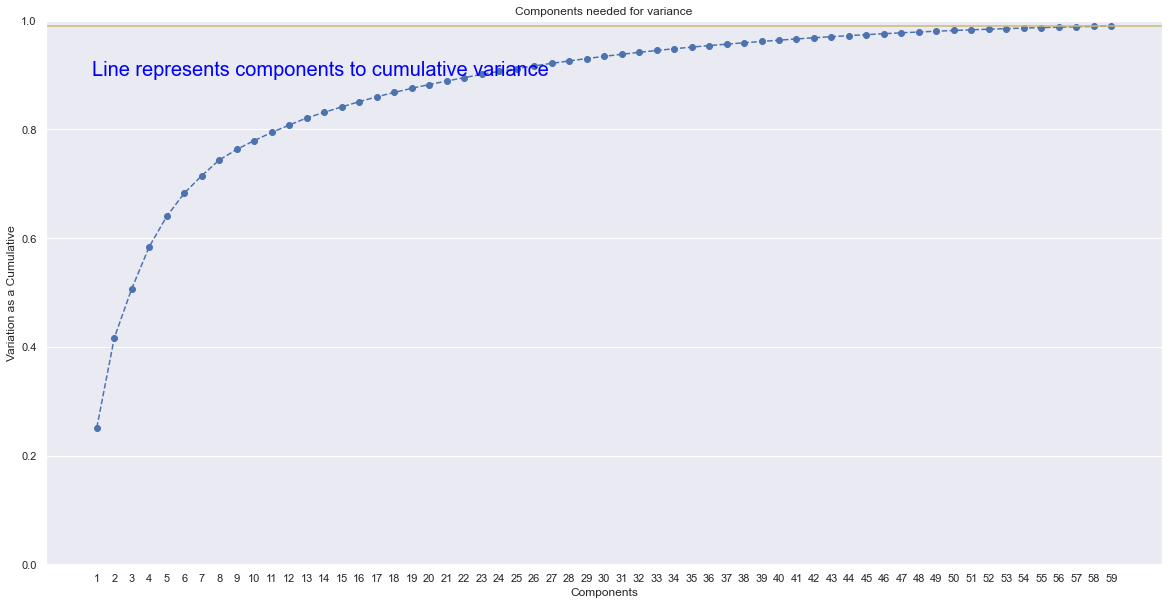

In [47]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
xi = np.arange(1,cumindex+1, step=1)
y = np.cumsum(pca1.explained_variance_ratio_)
plt.ylim(0.0,1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Components')
plt.xticks(np.arange(1,cumindex+1, step=1))
plt.ylabel('Variation as a Cumulative')
plt.title('Components needed for variance')
plt.axhline(y=0.99, color='y', linestyle='-')
plt.text(0.7, 0.9, 'Line represents components to cumulative variance', color = 'blue', fontsize=20)
ax.grid(axis='x')
plt.show()

In [48]:
pca1=PCA(n_components=cumindex)
pca1.fit(X_train1)
pca1.transform(X_test1)
pca1.transform(X_val1)

array([[ 1.11862888e+00,  2.16119509e+00,  6.64774007e+00, ...,
         3.65065825e-03,  2.19446432e-01,  3.45944755e-01],
       [-1.31363264e+00,  1.46435606e+00,  1.04246928e+00, ...,
        -3.65117289e-02, -5.75466689e-02,  3.00003607e-01],
       [-2.71253072e-01, -4.12775917e+00, -8.84526660e-01, ...,
        -7.43516408e-02, -9.21447944e-02,  1.36536205e-01],
       ...,
       [-1.00394750e+01,  3.20818506e+00,  4.05408025e+00, ...,
         6.31096851e-01,  2.05447647e-01,  6.27241703e-03],
       [ 9.54530464e-01,  5.06563105e+00,  3.84077929e-02, ...,
         3.06816313e-01, -3.16159178e-02,  2.29154350e-01],
       [-4.63053011e+00, -3.28033306e+00,  3.24713130e-01, ...,
        -2.86575814e-01,  3.97923386e-01, -6.02250092e-01]])

In [49]:
linreg2 = LinearRegression()
linreg2.fit(X_train1,y_train1)
linregpred2=linreg2.predict(X_val1)
p2_metrics(y_val1,linregpred2,negation=False)

{'mse': 0.018901500832311704,
 'mae': 0.09655686353902379,
 'r2': 0.6545944836863855}

In [50]:
coefficient2=linreg2.coef_.tolist()
columns1=CRIME_FILE1.columns.tolist()
linregdict2={}
for key in columns1:
    for value in coefficient2:
        linregdict2[key] = value
        coefficient2.remove(value)
        break
dictwithnodummies2={}
for i in originalcolumns:
 dictwithnodummies2[i]=0
for keys in dictwithnodummies2:
 keywith_=keys+'_'
 for keys2 in linregdict2:
  if keys==keys2 or keywith_ in keys2:
    dictwithnodummies2[keys]=dictwithnodummies2[keys]+linregdict2[keys2]
print(dictwithnodummies2)
dict4 =dict(sorted(dictwithnodummies.items(), key = itemgetter(1), reverse = True)[:10])
print(" ")
print("The top 10 weights with no dummies are are  " + str(dict4))

{'fold': -0.006461756852998491, 'population': 0.02741395137213775, 'householdsize': -0.005063203669380147, 'racepctblack': 0.048923732382330665, 'racePctWhite': -0.014510663483528374, 'racePctAsian': -0.014397507891167179, 'racePctHisp': -0.012734299893115754, 'agePct12t21': 0.018451650597849468, 'agePct12t29': -0.03329529922462407, 'agePct16t24': -0.014400347958176615, 'agePct65up': 0.015467960720988447, 'numbUrban': -0.04215828969475052, 'pctUrban': 0.021908017521516016, 'medIncome': -0.027371215552670046, 'pctWWage': -0.04542882252846586, 'pctWFarmSelf': 0.011829497813466979, 'pctWInvInc': -0.029732398058560146, 'pctWSocSec': -0.003266788654959822, 'pctWPubAsst': 0.021810550118562005, 'pctWRetire': -0.01636497696327151, 'medFamInc': 0.06156073872190545, 'perCapInc': -0.008166851405606738, 'whitePerCap': -0.04037145610031188, 'blackPerCap': -0.005965769517067427, 'indianPerCap': -0.006477699104031574, 'AsianPerCap': 0.01157778969611019, 'OtherPerCap': 0.007400106612009462, 'HispPerCa

In [51]:
print("Performance metrics and weights are identical to non transformed counterparts")

Performance metrics and weights are identical to non transformed counterparts


## 2.4 LASSO

Utilizing *cross-validation* you will Construct an $\ell_1$-regularized linear model using Scikit-learn's `LASSO`:
1. Using `GridSearchCV`, determine the best choice of the hyperparameter $\alpha$ out of values in the list `alphas` below.
2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.
3. Report the weights (coefficients) of the LASSO model and their associated features in ascending order. Note that LASSO attempts to set as many weights to zero in order to create a more parsimonious model while still maintaining regression performance. How many weights are non-zero?
 
### Please Read!
There are a few parameters for the `GridSearchCV` and `RandomizedSearchCV` functions that should be set:
- `scoring` - This controls the strategy to evaluate the performance of the cross-validated model on the test set, set it to `p2_metrics_scorer`.
- `refit` - This will refit an estimator using the best found parameters on the whole dataset, set it to `"mse"`
- `cv` - This will enable you to reuse your CV splits created in Part 2.1
    `n_jobs` - Number of jobs to run in parallel, if you have more than one core on your device (you should), set this to as many as you'd like to use, or to `-1` if you want to use all available cores.
- `return_train_score` - Setting this to `False` will reduce computational time.

In [52]:
from sklearn.linear_model import Lasso
import timeit
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
skf=KFold(n_splits=5, shuffle=True, random_state=23784559)

In [53]:
alphas = 10**np.linspace(1,-3,50)*0.5

In [54]:
#Summarizes model performance results produced during hyperparameter tuning
def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats

In [55]:
parameters = {'alpha':alphas,'random_state':[23784559]} 
lassomodel = Lasso()
start1 = timeit.default_timer()
lassogrid = GridSearchCV(lassomodel, parameters, scoring=p2_metrics_scorer, n_jobs=-1, refit="mse", cv=skf, verbose=3,return_train_score=False)
stop1 = timeit.default_timer()
start11 = timeit.default_timer()
lassogrid.fit(X_train01, y_train01)
stop11 = timeit.default_timer()
print('Best parameters: ',lassogrid.best_params_)
print('Best score: ',lassogrid.best_score_)
start12 = timeit.default_timer()
lassogridpred = lassogrid.predict(X_test01)
stop12 = timeit.default_timer()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'alpha': 0.0005, 'random_state': 23784559}
Best score:  -0.01893359327460544


In [56]:
print("Grid Search: ")
print(p2_metrics(y_test01,lassogridpred,negation=False))
print('Time to find best parameters in seconds: ',stop1-start1)  
print('Time to fit in seconds: ',stop11-start11)
print('Time to test in seconds: ',stop12-start12)
collate_ht_results(lassogrid,metric_keys=metric_keys,display=True)

Grid Search: 
{'mse': 0.01832123403426337, 'mae': 0.09316648374367953, 'r2': 0.6141202779155455}
Time to find best parameters in seconds:  0.00010399999996479892
Time to fit in seconds:  48.59514919999992
Time to test in seconds:  0.0005823999999847729
test_mse -0.01893359327460544 (0.00162911061864321)
test_mae -0.09672121312758211 (0.0038539443291907755)
test_r2 -0.6615699958944786 (0.013514232075723782)


{'mse_mean': -0.01893359327460544,
 'mse_std': 0.00162911061864321,
 'mae_mean': -0.09672121312758211,
 'mae_std': 0.0038539443291907755,
 'r2_mean': -0.6615699958944786,
 'r2_std': 0.013514232075723782}

In [57]:
parameters2 = {'alpha':alphas,'random_state':[23784559]} 
lassomodel2 = Lasso()
start2 = timeit.default_timer()
lassogrid2 = RandomizedSearchCV(lassomodel2, parameters2, scoring=p2_metrics_scorer, n_jobs=-1, refit="mse", cv=skf, verbose=3,return_train_score=False,n_iter=50)
stop2 = timeit.default_timer()
start21 = timeit.default_timer()
lassogrid2.fit(X_train01, y_train01)
stop21 = timeit.default_timer()
print('Best parameters: ',lassogrid2.best_params_)
print('Best score: ',lassogrid2.best_score_)
start22 = timeit.default_timer()
lassogridpred2 = lassogrid2.predict(X_test01)
stop22 = timeit.default_timer()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'random_state': 23784559, 'alpha': 0.0005}
Best score:  -0.01893359327460544


In [58]:
print("Randomized Search: ")
print(p2_metrics(y_test01,lassogridpred2,negation=False))
print('Time to find best parameters in seconds: ',stop2-start2)  
print('Time to fit in seconds: ',stop21-start21)
print('Time to test in seconds: ',stop22-start22)
collate_ht_results(lassogrid2,metric_keys=metric_keys,display=True)

Randomized Search: 
{'mse': 0.01832123403426337, 'mae': 0.09316648374367953, 'r2': 0.6141202779155455}
Time to find best parameters in seconds:  7.790000006480113e-05
Time to fit in seconds:  1.1895862999999736
Time to test in seconds:  0.0004973999999720036
test_mse -0.01893359327460544 (0.00162911061864321)
test_mae -0.09672121312758211 (0.0038539443291907755)
test_r2 -0.6615699958944786 (0.013514232075723782)


{'mse_mean': -0.01893359327460544,
 'mse_std': 0.00162911061864321,
 'mae_mean': -0.09672121312758211,
 'mae_std': 0.0038539443291907755,
 'r2_mean': -0.6615699958944786,
 'r2_std': 0.013514232075723782}

In [59]:
lassomodel3 = Lasso(alpha=0.0005,random_state=23784559)
lassomodel3.fit(X_train01,y_train01)
coefficientl=lassomodel3.coef_.tolist()
lassodict2={}
for key in columns1:
    for value in coefficientl:
        lassodict2[key] = value
        coefficientl.remove(value)
        break
dictwithnodummiesl={}
for i in originalcolumns:
 dictwithnodummiesl[i]=0
for keys in dictwithnodummiesl:
 keywith_=keys+'_'
 for keys2 in lassodict2:
  if keys==keys2 or keywith_ in keys2:
    dictwithnodummiesl[keys]=dictwithnodummiesl[keys]+lassodict2[keys2]
dict5 =dict(sorted(dictwithnodummiesl.items(), key = itemgetter(1), reverse = True)[:len(dictwithnodummiesl)])
print(" ")
print("The weights with no dummies in ascending order are " + str(dict5))
numberiszero=0
for keys in dictwithnodummiesl:
    if dictwithnodummiesl[keys]==0.0:
     numberiszero=numberiszero+1
print("Number of features not equal to zero ",(len(dictwithnodummiesl)-numberiszero))

 
The weights with no dummies in ascending order are {'PctPersDenseHous': 0.050719372345490316, 'PctIlleg': 0.0431666110952738, 'racepctblack': 0.04005606369631218, 'PersPerOccupHous': 0.03419519014992146, 'MedRent': 0.033119405100771916, 'MalePctNevMarr': 0.030507004960040503, 'MalePctDivorce': 0.03017158487005436, 'NumStreet': 0.02385819407644086, 'HousVacant': 0.022431004566305097, 'PctEmploy': 0.01848406095818683, 'pctUrban': 0.01673524021534094, 'PctForeignBorn': 0.016190824478235784, 'PctOccupMgmtProf': 0.010822608304632064, 'pctWSocSec': 0.009800110666034405, 'MedRentPctHousInc': 0.008813986712579108, 'LemasPctOfficDrugUn': 0.008138975024275819, 'PctVacantBoarded': 0.007979785073068166, 'pctWFarmSelf': 0.007874954088742973, 'PctHousNoPhone': 0.007861880335372579, 'OtherPerCap': 0.007490970464947416, 'PctSameCity85': 0.006277203068908143, 'PctOccupManu': 0.005605646871983514, 'PctRecImmig10': 0.005368503099154044, 'PctHousLess3BR': 0.00517272892459755, 'HispPerCap': 0.00511744124

## 2.5 Multilayer Perceptron (MLP)

Utilizing *cross-validation* you will construct an MLP regression model using Scikit-learn's `MLPRegressor`:
1. Using `GridSearchCV`, determine the best choice of hyperparameters out of the following possible values:
- *Number of hidden layers*: [1, 2, 3]
- *Number of neurons per layer*: [10, 20, 50]
- *Learning rate*: [1e-5, 1e-4, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.

 
### Please Read!
In addition to utilizing the same `GridSearchCV` parameters as in 2.5, the `MLPRegressor` function should have the following parameters set:
- `max_iter` -  This controls the maximum number of rounds of backpropagation/gradient descent; set it to 10,000.
- `early_stopping` - This will reserve a portion of the training data tha can be used to evaluate convergence progress in order to stop training early; set it to `True`.

In [60]:
from sklearn.neural_network import MLPRegressor

In [61]:
parametersr = {'hidden_layer_sizes':[(10,),(20,),(50,),(10,10,),(20,20,),(50,50,),(10,10,10,),(20,20,20,),(50,50,50,)],'learning_rate_init':[0.00001,0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]} 
regr1 = MLPRegressor(random_state=23784559, max_iter=10000,early_stopping=True)
start3 = timeit.default_timer()
regrgrid = GridSearchCV(regr1, parametersr, scoring=p2_metrics_scorer, n_jobs=-1, refit="mse",cv=skf, verbose=3,return_train_score=False)
stop3 = timeit.default_timer()
start31 = timeit.default_timer()
regrgrid.fit(X_train01, y_train01)
stop31 = timeit.default_timer()
print('Best parameters: ',regrgrid.best_params_)
print('Best score: ',regrgrid.best_score_)
start32 = timeit.default_timer()
regrgridpred = regrgrid.predict(X_test01)
stop32 = timeit.default_timer()

Fitting 5 folds for each of 99 candidates, totalling 495 fits
Best parameters:  {'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1}
Best score:  -0.021417313500144912


In [62]:
print("Grid Search: ")
print(p2_metrics(y_test01,regrgridpred,negation=False))
print('Time to find best parameters in seconds: ',stop3-start3)  
print('Time to fit in seconds: ',stop31-start31)
print('Time to test in seconds: ',stop32-start32)
collate_ht_results(regrgrid,metric_keys=metric_keys,display=True)

Grid Search: 
{'mse': 0.02079173730063464, 'mae': 0.1009306226602191, 'r2': 0.5620868225242087}
Time to find best parameters in seconds:  0.00019720000000233995
Time to fit in seconds:  162.8041482
Time to test in seconds:  0.00116420000006201
test_mse -0.021417313500144912 (0.0032760742427384304)
test_mae -0.10249962753842264 (0.008042507739511729)
test_r2 -0.6184509886998015 (0.042100340362719285)


{'mse_mean': -0.021417313500144912,
 'mse_std': 0.0032760742427384304,
 'mae_mean': -0.10249962753842264,
 'mae_std': 0.008042507739511729,
 'r2_mean': -0.6184509886998015,
 'r2_std': 0.042100340362719285}

## 2.6 Final Models

1. Using the full training set (**training + validation**), train *two* linear regression models, one with and without PCA preprocessing, then apply them to the test set. For LASSO and MLP, you can utilize the best models found during cross-validation and just apply them to the test set.
2. Create a bar chart of the three regression metrics for each model on the same plot.
3. How do the models's performances compare? What do the metrics reveal about the dataset?

In [63]:
X_train01withpca=X_train01
X_test01withpca=X_test01
pca2=PCA(n_components=cumindex)
pca2.fit(X_train01withpca)
pca2.transform(X_test01withpca)
finallinregpca = LinearRegression()
finallinregpca.fit(X_train01withpca,y_train01)
finallinregpredpca=finallinregpca.predict(X_test01withpca)
p2_metrics(y_test01,finallinregpredpca,negation=False)

{'mse': 0.01889858409941867,
 'mae': 0.09651812333584919,
 'r2': 0.6019601973079334}

In [64]:
finallinreg = LinearRegression()
finallinreg.fit(X_train01,y_train01)
finallinregpred=finallinreg.predict(X_test01)
p2_metrics(y_test01,finallinregpred,negation=False)

{'mse': 0.01889858409941867,
 'mae': 0.09651812333584919,
 'r2': 0.6019601973079334}

In [65]:
lassomodel4 = Lasso(random_state= 23784559,alpha=0.0005)
lassomodel4.fit(X_train01,y_train01)
finallasso=lassomodel4.predict(X_test01)
p2_metrics(y_test01,finallasso,negation=False)

{'mse': 0.01832123403426337,
 'mae': 0.09316648374367953,
 'r2': 0.6141202779155455}

In [66]:
regr2 = MLPRegressor(random_state=23784559, max_iter=10000,early_stopping=True,hidden_layer_sizes=(10,),learning_rate_init= 0.1)
regr2.fit(X_train01,y_train01)
finalregr2=regr2.predict(X_test01)
p2_metrics(y_test01,finalregr2,negation=False)

{'mse': 0.02079173730063464,
 'mae': 0.1009306226602191,
 'r2': 0.5620868225242087}

In [67]:
print("Final Lin Reg with PCA ",p2_metrics(y_test01,finallinregpredpca,negation=False))
print("Final Lin Reg without PCA ",p2_metrics(y_test01,finallinregpred,negation=False))
print("Final Lasso ",p2_metrics(y_test01,finallasso,negation=False))
print("Final MLPRegressor ",p2_metrics(y_test01,finalregr2,negation=False))

Final Lin Reg with PCA  {'mse': 0.01889858409941867, 'mae': 0.09651812333584919, 'r2': 0.6019601973079334}
Final Lin Reg without PCA  {'mse': 0.01889858409941867, 'mae': 0.09651812333584919, 'r2': 0.6019601973079334}
Final Lasso  {'mse': 0.01832123403426337, 'mae': 0.09316648374367953, 'r2': 0.6141202779155455}
Final MLPRegressor  {'mse': 0.02079173730063464, 'mae': 0.1009306226602191, 'r2': 0.5620868225242087}


In [68]:
linregpcadict=p2_metrics(y_test01,finallinregpredpca,negation=False)
linregdict=p2_metrics(y_test01,finallinregpred,negation=False)
lassodict=p2_metrics(y_test01,finallasso,negation=False)
mlpregdict=p2_metrics(y_test01,finalregr2,negation=False)

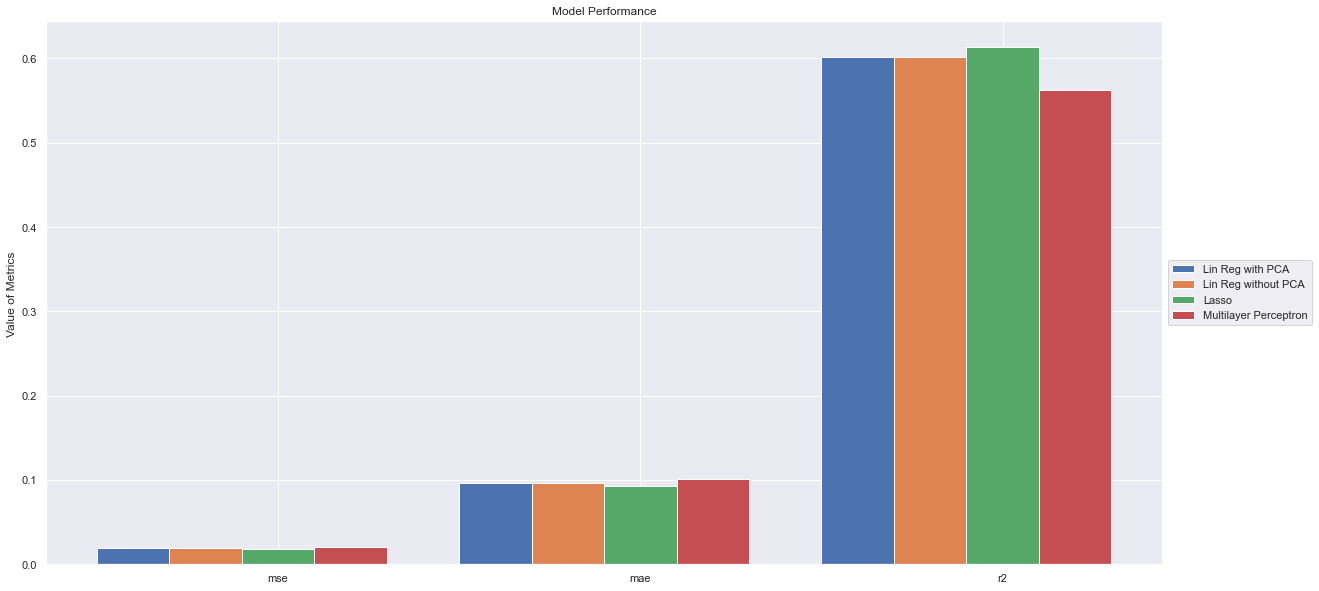

In [69]:
labels=metric_keys
x = np.arange(len(labels))
width = 0.2 
linregpcametrics=[linregpcadict[l] for l in labels]
linregmetrics=[linregdict[l] for l in labels]
lassometrics = [lassodict[l] for l in labels]
mlpregmetrics = [mlpregdict[l] for l in labels]
fig, ax = plt.subplots()
linregpcabar = ax.bar(x-width-width, linregpcametrics, width,label='Lin Reg with PCA')
linregbar = ax.bar(x-width, linregmetrics, width, label='Lin Reg without PCA')
lassobar = ax.bar(x, lassometrics, width, label='Lasso')
mlpregbar=ax.bar(x+width,mlpregmetrics, width, label='Multilayer Perceptron')
ax.set_ylabel('Value of Metrics ')
ax.set_title('Model Performance')
plt.xticks(ticks=x,labels=labels)
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [70]:
print("Lasso is the best performing model in regards to mean square error, mean absolute error. Linear Regression with or without PCA is virtually equivalent but performs worse than Lasso. Multilayer Perceptron performs the worst out of all. The fact that PCA's effect on results was minimal to nonexistent indicates that the dataset is poorly correlation. The variables with the most positive weight have fairly small weights as proof of this. MLP's poor performance indicates that it is not the best in regards to regression. The fact that the dataset is poorly correlated prevents a neural network from properly recognizing patterns. That is why there is a large margin of mean absolute error. I had to purge many variables due to so many being mostly nulls, and otherpercap's datatype was inaccurate and had to be changed. Lasso's restrictions to prevent overfitting are best for this type of unorganized and lacking data.")

Lasso is the best performing model in regards to mean square error, mean absolute error. Linear Regression with or without PCA is virtually equivalent but performs worse than Lasso. Multilayer Perceptron performs the worst out of all. The fact that PCA's effect on results was minimal to nonexistent indicates that the dataset is poorly correlation. The variables with the most positive weight have fairly small weights as proof of this. MLP's poor performance indicates that it is not the best in regards to regression. The fact that the dataset is poorly correlated prevents a neural network from properly recognizing patterns. That is why there is a large margin of mean absolute error. I had to purge many variables due to so many being mostly nulls, and otherpercap's datatype was inaccurate and had to be changed. Lasso's restrictions to prevent overfitting are best for this type of unorganized and lacking data.
